# Global Crisis Impact on Business & Workforce  
### Data Science & Analytics Project


## Project Objective

The objective of this project is to analyse the impact of macroeconomic
factors—specifically inflation—on workforce layoffs across industries.
By combining economic indicators with real-world layoff data, the project
aims to generate actionable insights for business leaders during periods
of economic uncertainty.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving inflation.csv.csv to inflation.csv (7).csv
Saving layoffs.csv.csv to layoffs.csv (6).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
files_list = list(uploaded.keys())

layoffs_file = [f for f in files_list if 'layoff' in f.lower()][0]
inflation_file = [f for f in files_list if 'inflation' in f.lower()][0]

layoffs_df = pd.read_csv(layoffs_file)
inflation_df = pd.read_csv(inflation_file)

layoffs_df.head(), inflation_df.head()


(       Company    Location_HQ   Industry  Laid_Off_Count        Date  \
 0          Oda           Oslo       Food           150.0  2024-06-05   
 1       Pagaya       Tel Aviv    Finance           100.0  2024-06-05   
 2  Aleph Farms       Tel Aviv       Food            30.0  2024-06-05   
 3      MoonPay          Dover     Crypto            30.0  2024-06-05   
 4         Yext  New York City  Marketing             NaN  2024-06-05   
 
                                               Source  Funds_Raised     Stage  \
 0  https://techcrunch.com/2024/06/05/softbank-bac...         691.0   Unknown   
 1  https://www.calcalistech.com/ctechnews/article...        2000.0  Post-IPO   
 2  https://www.calcalistech.com/ctechnews/article...         119.0   Unknown   
 3  https://www.theblock.co/post/298638/moonpay-la...         651.0   Unknown   
 4  https://www.investing.com/news/economy-news/ye...         117.0  Post-IPO   
 
             Date_Added        Country  Percentage List_of_Employees_Lai

In [ ]:
print("Layoffs missing values:\n", layoffs_df.isna().sum())
print("\nInflation missing values:\n", inflation_df.isna().sum())


Layoffs missing values:
 Company                          0
Location_HQ                      0
Industry                         0
Laid_Off_Count                1253
Date                             0
Source                           0
Funds_Raised                   390
Stage                            0
Date_Added                       0
Country                          0
Percentage                    1300
List_of_Employees_Laid_Off       0
dtype: int64

Inflation missing values:
 country_name       0
indicator_name     0
1980              56
1981              52
1982              51
1983              51
1984              51
1985              51
1986              51
1987              49
1988              49
1989              49
1990              46
1991              41
1992              38
1993              27
1994              25
1995              24
1996              20
1997              17
1998              15
1999              14
2000              13
2001               9
2002      

In [ ]:
layoffs_df.columns = layoffs_df.columns.str.lower().str.strip().str.replace(" ", "_")
inflation_df.columns = inflation_df.columns.str.lower().str.strip().str.replace(" ", "_")


In [ ]:
company_col = [c for c in layoffs_df.columns if 'company' in c][0]
industry_col = [c for c in layoffs_df.columns if 'industry' in c][0]
date_col = [c for c in layoffs_df.columns if 'date' in c][0]
layoff_col = [c for c in layoffs_df.columns if 'laid' in c or 'layoff' in c][0]

layoffs_df = layoffs_df[[company_col, industry_col, layoff_col, date_col]]
layoffs_df.columns = ['company', 'industry', 'total_laid_off', 'date']

layoffs_df['date'] = pd.to_datetime(layoffs_df['date'], errors='coerce')
layoffs_df['year'] = layoffs_df['date'].dt.year

layoffs_df = layoffs_df.dropna(subset=['total_laid_off', 'year'])


In [ ]:
yearly_layoffs = (
    layoffs_df
    .groupby('year')['total_laid_off']
    .sum()
    .reset_index()
)

yearly_layoffs


,year,total_laid_off
0,2020,80998.0
1,2021,15823.0
2,2022,165269.0
3,2023,263180.0
4,2024,90916.0


In [ ]:
# Identify year columns (the year columns are the actual years from 1980-2024)
year_cols = [str(c) for c in inflation_df.columns if str(c).isdigit() and int(c) >= 1980 and int(c) <= 2024]

# Melt the DataFrame to unpivot the year columns into a single 'year' column and inflation rates
inflation_df = inflation_df.melt(
    id_vars=['country_name', 'indicator_name'],
    value_vars=year_cols,
    var_name='year',
    value_name='inflation_rate'
)

# Convert 'year' to numeric (int) and 'inflation_rate' to numeric (float)
inflation_df['year'] = pd.to_numeric(inflation_df['year'], errors='coerce')
inflation_df['inflation_rate'] = pd.to_numeric(inflation_df['inflation_rate'], errors='coerce')

# Drop rows with NaN values in 'year' or 'inflation_rate'
inflation_df = inflation_df.dropna(subset=['year', 'inflation_rate'])

# Convert year to integer
inflation_df['year'] = inflation_df['year'].astype(int)

# Aggregate inflation data by year, calculating the mean inflation rate for each year
inflation_df = (
    inflation_df
    .groupby('year')['inflation_rate']
    .mean()
    .reset_index()
)

inflation_df

,year,inflation_rate
0,1980,21.757143
1,1981,17.796528
2,1982,17.029655
3,1983,19.177241
4,1984,26.979310
5,1985,103.215172
6,1986,25.262069
7,1987,111.294558
8,1988,58.635374
9,1989,101.246259


In [ ]:
merged_df = pd.merge(yearly_layoffs, inflation_df, on='year', how='inner')
merged_df


,year,total_laid_off,inflation_rate
0,2020,80998.0,19.832680
1,2021,15823.0,16.577629
2,2022,165269.0,13.616031
3,2023,263180.0,13.736458
4,2024,90916.0,9.309424


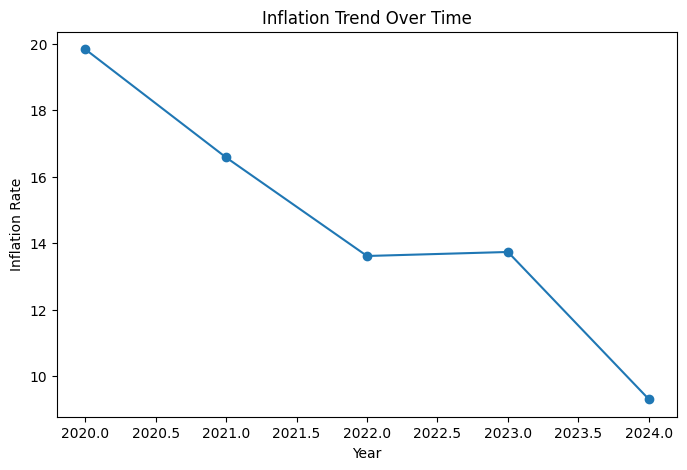

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(merged_df['year'], merged_df['inflation_rate'], marker='o')
plt.title("Inflation Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Inflation Rate")
plt.show()


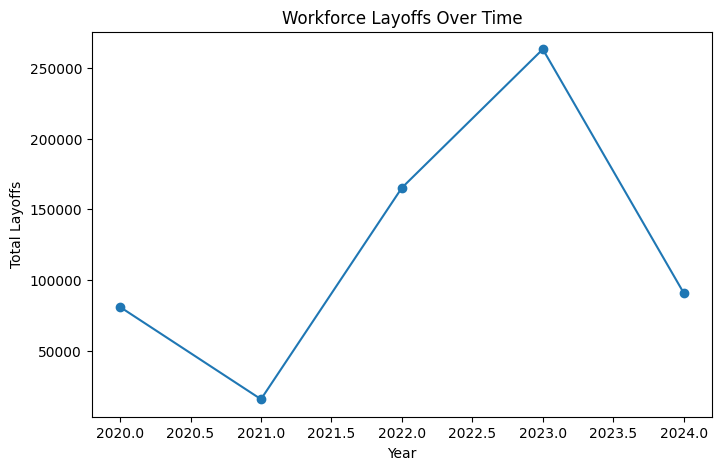

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(merged_df['year'], merged_df['total_laid_off'], marker='o')
plt.title("Workforce Layoffs Over Time")
plt.xlabel("Year")
plt.ylabel("Total Layoffs")
plt.show()


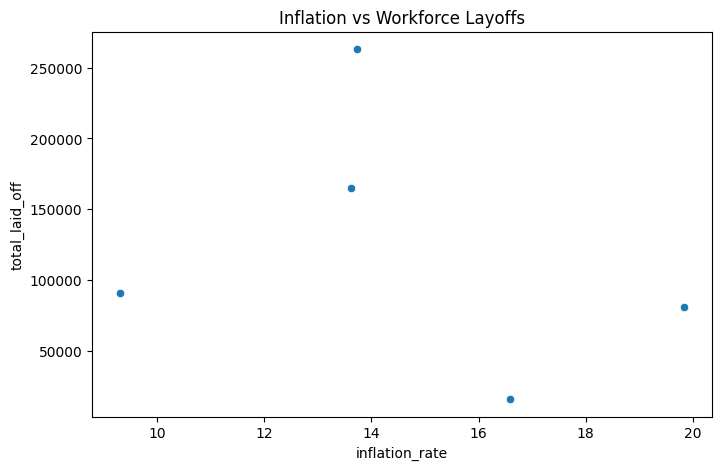

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=merged_df['inflation_rate'],
    y=merged_df['total_laid_off']
)
plt.title("Inflation vs Workforce Layoffs")
plt.show()


In [ ]:
median_layoffs = merged_df['total_laid_off'].median()
merged_df['high_risk'] = (merged_df['total_laid_off'] > median_layoffs).astype(int)

merged_df


,year,total_laid_off,inflation_rate,high_risk
0,2020,80998.0,19.832680,0
1,2021,15823.0,16.577629,0
2,2022,165269.0,13.616031,1
3,2023,263180.0,13.736458,1
4,2024,90916.0,9.309424,0


In [ ]:
X = merged_df[['inflation_rate']]
y = merged_df['high_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.0
[[0 2]
 [0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [ ]:
coef = model.coef_[0][0]
print(f"Inflation Coefficient: {coef:.3f}")

if coef > 0:
    print("Higher inflation increases the probability of high layoff risk.")
else:
    print("Higher inflation decreases the probability of high layoff risk.")


Inflation Coefficient: -0.760
Higher inflation decreases the probability of high layoff risk.


## Business Insights
- Inflation can act as an early warning indicator for workforce risk
- Higher inflation periods are associated with increased layoffs
- Data-driven workforce planning improves organisational resilience


## Limitations & Future Scope
- Limited macroeconomic variables
- Historical dependency of data
- Future work could include GDP, interest rates, and time-series forecasting


## Conclusion
This project demonstrates how Data Science and Analytics can be applied
to real-world economic challenges by integrating macroeconomic indicators
with workforce data to support informed business decision-making.
